PREPROCESSING STEP

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("/content/Ipm_Stunting.csv")
df = df.drop(columns=["Unnamed: 0"])
df["Latitude"] = (
    df["Latitude"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.strip()
    .astype(float)
)

df["Longitude"] = (
    df["Longitude"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.strip()
    .astype(float)
)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   kabupaten/kota_code_x           190 non-null    int64  
 1   kabupaten/kota                  190 non-null    object 
 2   komposit                        190 non-null    int64  
 3   ncpr                            190 non-null    float64
 4   kemiskinan_(%)                  190 non-null    float64
 5   pengeluaran_pangan_(%)          190 non-null    float64
 6   tanpa_listrik_(%)               190 non-null    float64
 7   tanpa_air_bersih_(%)            190 non-null    float64
 8   lama_sekolah_perempuan_(tahun)  190 non-null    float64
 9   rasio_tenaga_kesehatan          190 non-null    float64
 10  angka_harapan_hidup_(tahun)     190 non-null    float64
 11  stunting_(%)                    190 non-null    float64
 12  ikp                             190 

In [ ]:
df_2024 = df[df["tahun"] == 2024]

# Hitung rata-rata
mean_stunting = df_2024["stunting_(%)"].mean()
mean_ipm = df_2024["ipm"].mean()

mean_stunting, mean_ipm

(np.float64(18.963157894736838), np.float64(75.31052631578949))

FIND MEAN IN Each indicator

In [ ]:
df_2020 = df[df["tahun"] == 2020]
df_2024 = df[df["tahun"] == 2024]

# Hitung rata-rata nasional
mean_2020 = df_2020["stunting_(%)"].mean()
mean_2024 = df_2024["stunting_(%)"].mean()

# Hitung penurunan
penurunan = mean_2020 - mean_2024

print("Rata-rata Stunting 2020 :", round(mean_2020, 2), "%")
print("Rata-rata Stunting 2024 :", round(mean_2024, 2), "%")
print("Penurunan Nasional       :", round(penurunan, 2), "%")

Rata-rata Stunting 2020 : 17.75 %
Rata-rata Stunting 2024 : 18.96 %
Penurunan Nasional       : -1.21 %


# **VARIABEL YANG DIPILH UNTUK ANALISIS CLUSTERING**

In [ ]:
import pandas as pd


features = [
    "stunting_(%)",
    "kemiskinan_(%)",
    "pengeluaran_pangan_(%)",
    "tanpa_air_bersih_(%)",
    "tanpa_listrik_(%)",
    "ipm",
    "lama_sekolah_perempuan_(tahun)",
    "angka_harapan_hidup_(tahun)",
    "harapan_lama_sekolah",
    "rata_rata_lama_sekolah",
    "pdrb_perkapita_ribu"
]
df_feat = df[features].dropna()


CORELATION MATRIKS UNTUK CHEK MULTIKOLINERITAS

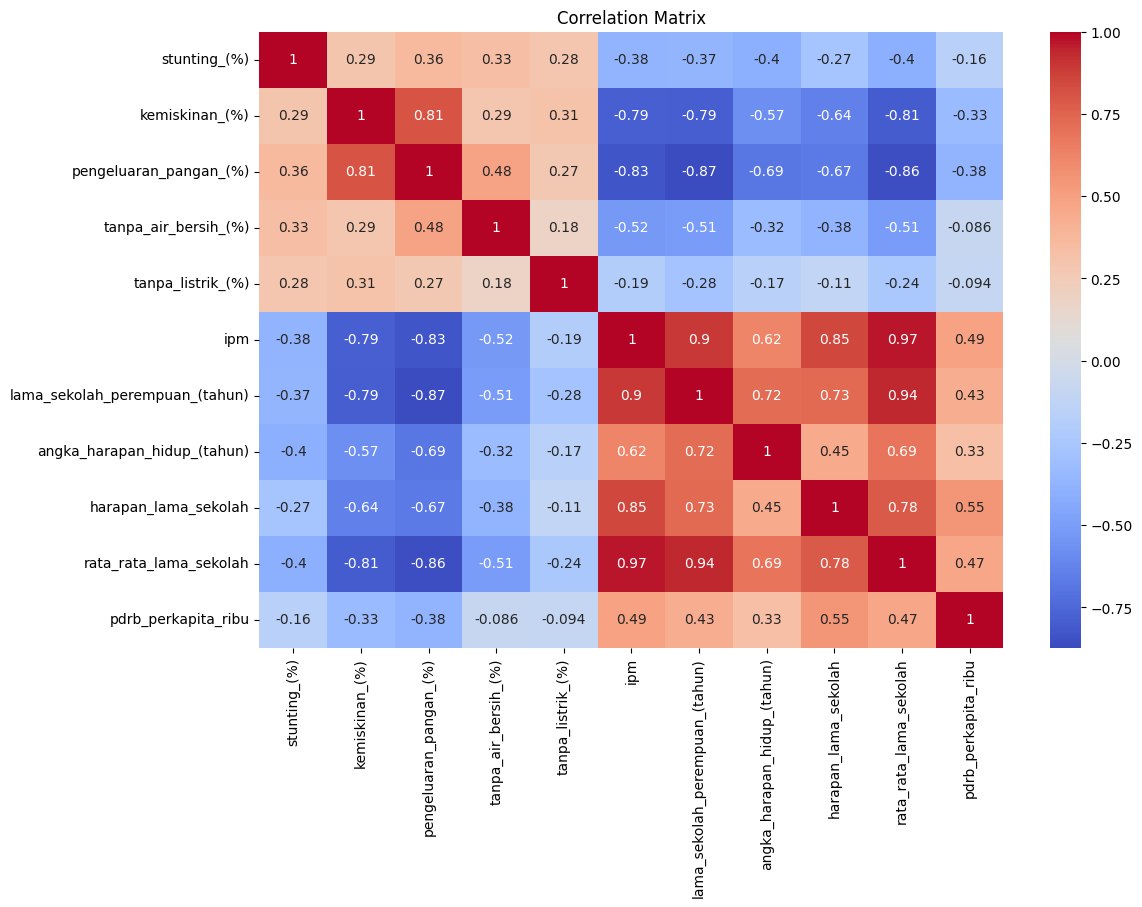

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_feat.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
group_col = "kabupaten/kota"
df_mean = df.groupby(group_col)[features].mean().reset_index()
print(df_mean.head())
print("Jumlah kabupaten setelah dirata-ratakan:", len(df_mean))


    kabupaten/kota  stunting_(%)  kemiskinan_(%)  pengeluaran_pangan_(%)  \
0   kab. bangkalan        21.574          19.964                  52.342   
1  kab. banyuwangi        13.214           7.700                  19.470   
2      kab. blitar        17.100           9.064                  19.902   
3  kab. bojonegoro        17.680          12.582                  30.012   
4   kab. bondowoso        27.144          13.808                  45.904   

   tanpa_air_bersih_(%)  tanpa_listrik_(%)     ipm  \
0                34.800              0.046  66.170   
1                24.066              0.110  73.142   
2                25.596              0.038  72.206   
3                13.568              0.080  71.316   
4                35.758              0.032  70.006   

   lama_sekolah_perempuan_(tahun)  angka_harapan_hidup_(tahun)  \
0                           6.070                       70.368   
1                           7.468                       70.870   
2                   

# **SCREE PLOT UNTUK MENENUMKAN THE BEST PCA**

PC1: 0.6309 | Cumulative: 0.6309
PC2: 0.0956 | Cumulative: 0.7264
PC3: 0.0808 | Cumulative: 0.8072
PC4: 0.0622 | Cumulative: 0.8694
PC5: 0.0597 | Cumulative: 0.9291
PC6: 0.0282 | Cumulative: 0.9574
PC7: 0.0191 | Cumulative: 0.9765
PC8: 0.0129 | Cumulative: 0.9894
PC9: 0.0087 | Cumulative: 0.9981
PC10: 0.0017 | Cumulative: 0.9998
PC11: 0.0002 | Cumulative: 1.0000


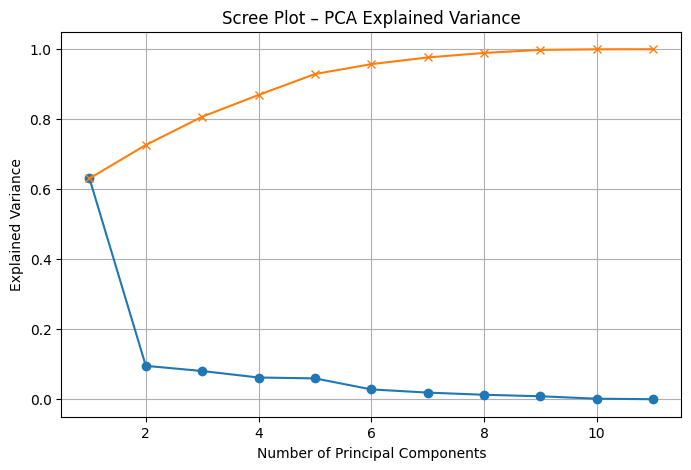

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


df_feat = df_mean[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_feat)

pca = PCA()
pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

for i, (ev, cv) in enumerate(zip(explained_var, cum_var), start=1):
    print(f"PC{i}: {ev:.4f} | Cumulative: {cv:.4f}")

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.plot(range(1, len(explained_var)+1), cum_var, marker='x')
plt.title("Scree Plot – PCA Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio (3 PC):")
print(pca.explained_variance_ratio_)
print("Total Variance (Cumulative):", pca.explained_variance_ratio_.sum())


sil_scores = []
K_range = range(2, 8)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    sil_scores.append(silhouette_score(X_pca, labels))

best_k = K_range[np.argmax(sil_scores)]
print("Best K:", best_k)


Explained Variance Ratio (3 PC):
[0.6308653  0.09556823 0.08076218]
Total Variance (Cumulative): 0.8071957113030205
Best K: 2


In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio (3 PC):")
print(pca.explained_variance_ratio_)
print("Total Variance:", pca.explained_variance_ratio_.sum())


Explained Variance Ratio (3 PC):
[0.6308653  0.09556823 0.08076218]
Total Variance: 0.8071957113030205


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)


In [ ]:
df_mean["cluster"] = clusters

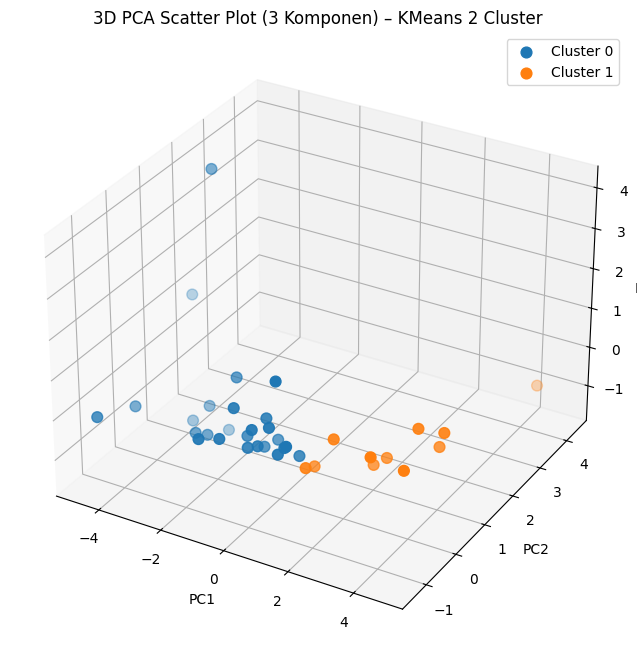

In [ ]:
df_pca = df_mean.copy()
df_pca["PC1"] = X_pca[:, 0]
df_pca["PC2"] = X_pca[:, 1]
df_pca["PC3"] = X_pca[:, 2]

# --- 4. Scatter plot PCA ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in df_pca["cluster"].unique():
    subset = df_pca[df_pca["cluster"] == cluster]
    ax.scatter(
        subset["PC1"], subset["PC2"], subset["PC3"],
        label=f"Cluster {cluster}", s=60
    )

# Label
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.title("3D PCA Scatter Plot (3 Komponen) – KMeans 2 Cluster")
ax.legend()
plt.show()

In [ ]:
cluster_means = df_mean.groupby("cluster")[features].mean()
cluster_means

,stunting_(%),kemiskinan_(%),pengeluaran_pangan_(%),tanpa_air_bersih_(%),tanpa_listrik_(%),ipm,lama_sekolah_perempuan_(tahun),angka_harapan_hidup_(tahun),harapan_lama_sekolah,rata_rata_lama_sekolah,pdrb_perkapita_ribu
cluster,,,,,,,,,,,
0,20.183926,12.428593,34.633037,25.372593,0.065926,71.560444,7.378000,71.348519,13.032370,7.384370,39095.059259
1,14.810545,6.290000,11.075818,13.321818,0.009273,80.160000,10.129818,73.162909,14.507636,10.360182,131842.563636


In [ ]:
cluster_means.to_csv("/content/data_radar.csv")

# **RADAR CHAT UTUK MELIHAT PROFIL TIAP CLUSTER**

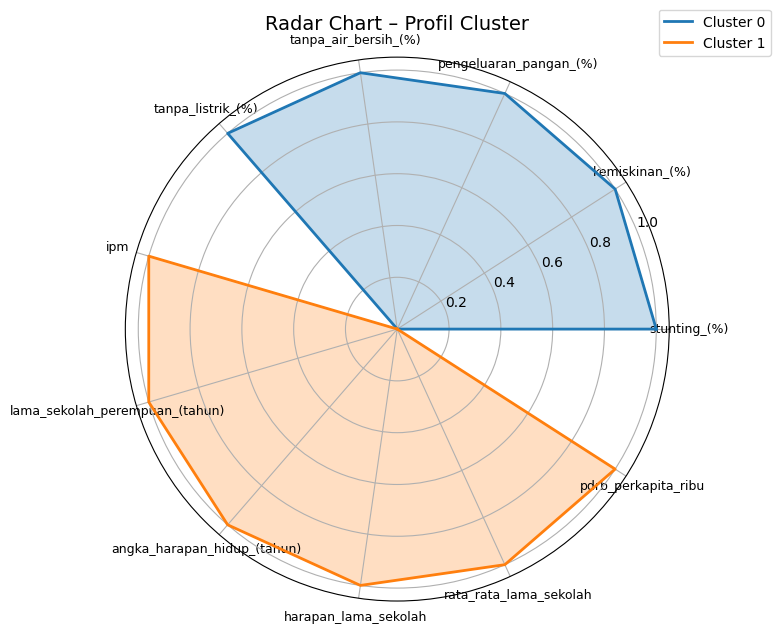

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_plot = cluster_means.copy()
df_norm = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())
variables = df_norm.columns.tolist()
N = len(variables)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = ["#1f77b4", "#ff7f0e"]

for idx, cluster in enumerate(df_norm.index):
    values = df_norm.loc[cluster].tolist()
    values += values[:1]

    ax.plot(angles, values, linewidth=2, label=f"Cluster {cluster}", color=colors[idx])
    ax.fill(angles, values, alpha=0.25, color=colors[idx])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables, fontsize=9)

plt.title("Radar Chart – Profil Cluster", size=14, pad=20)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

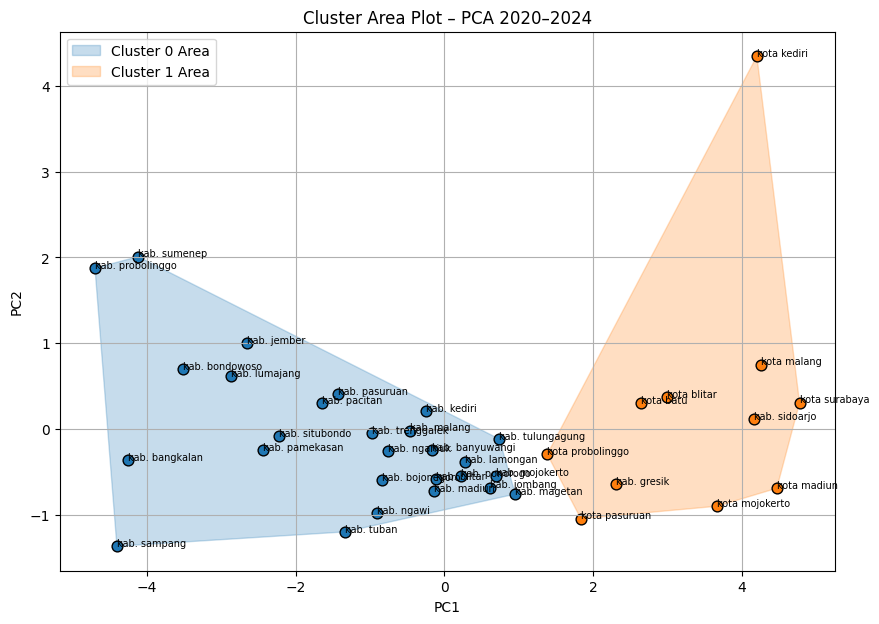

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

plt.figure(figsize=(10,7))

colors = ["#1f77b4", "#ff7f0e"]
for cl in np.unique(clusters):
    idx = clusters == cl


    X_cl = X_pca[idx, :2]


    if len(X_cl) >= 3:
        hull = ConvexHull(X_cl)
        hull_points = X_cl[hull.vertices]

        plt.fill(
            hull_points[:,0],
            hull_points[:,1],
            alpha=0.25,
            color=colors[cl],
            label=f"Cluster {cl} Area"
        )

    # --- Scatter tiap titik ---
    plt.scatter(
        X_cl[:,0], X_cl[:,1],
        s=60,
        color=colors[cl],
        edgecolor="black"
    )

# Label nama kabupaten
for i in range(len(df_mean)):
    plt.text(
        X_pca[i,0], X_pca[i,1],
        df_mean[group_col].iloc[i],
        fontsize=7
    )

plt.title("Cluster Area Plot – PCA 2020–2024")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [ ]:
df_plot = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "Cluster": clusters,
    "Label": df_mean[group_col].values
})

df_plot

,PC1,PC2,Cluster,Label
0,-4.259904,-0.364655,0,kab. bangkalan
1,-0.162497,-0.247022,0,kab. banyuwangi
2,-0.110588,-0.581214,0,kab. blitar
3,-0.837707,-0.592622,0,kab. bojonegoro
4,-3.518678,0.697656,0,kab. bondowoso
5,2.306968,-0.639542,1,kab. gresik
6,-2.650362,0.998909,0,kab. jember
7,0.619422,-0.680474,0,kab. jombang
8,-0.248833,0.205825,0,kab. kediri
9,0.278040,-0.387520,0,kab. lamongan


In [ ]:
df_plot.to_csv("/content/plot_cluster.csv")

In [ ]:
df_mean.to_csv("/content/hasil_cluster.csv")

Interpretasi 2 Cluster
Cluster 0 — Kondisi Buruk / Risiko Tinggi

Ciri-cirinya:
* Stunting tinggi → 20.18%
* Kemiskinan tinggi → 12.43%
* Akses air bersih buruk → 25.37% tanpa air bersih
* Pengeluaran pangan tinggi → 34.63%
* IPM rendah → 71.56
* Lama sekolah perempuan rendah → 7.38 tahun
* PDRB/kapita sangat rendah → 39.095 ribu

Kesimpulan:
➡️ Cluster ini berisi kabupaten tertinggal, kondisi sosial ekonomi rendah, pendidikan rendah, dan akses layanan dasar kurang baik.
➡️ Risiko stunting tinggi & perlu prioritas intervensi.

Cluster 1
* Stunting rendah → 14.81%
* Kemiskinan rendah → 6.29%
* Pengeluaran pangan rendah → 11.07%
* Akses air bersih lebih baik → 13.32% tanpa air bersih
* IPM tinggi → 80.16
* Lama sekolah perempuan tinggi → 10.13 tahun
* PDRB/kapita sangat tinggi → 131.842 ribu

Kesimpulan:
➡️ Cluster ini adalah kabupaten maju, IPM lebih tinggi, ekonomi kuat, pendidikan bagus, dan prevalensi stunting lebih rendah.

<Figure size 1000x1000 with 0 Axes>

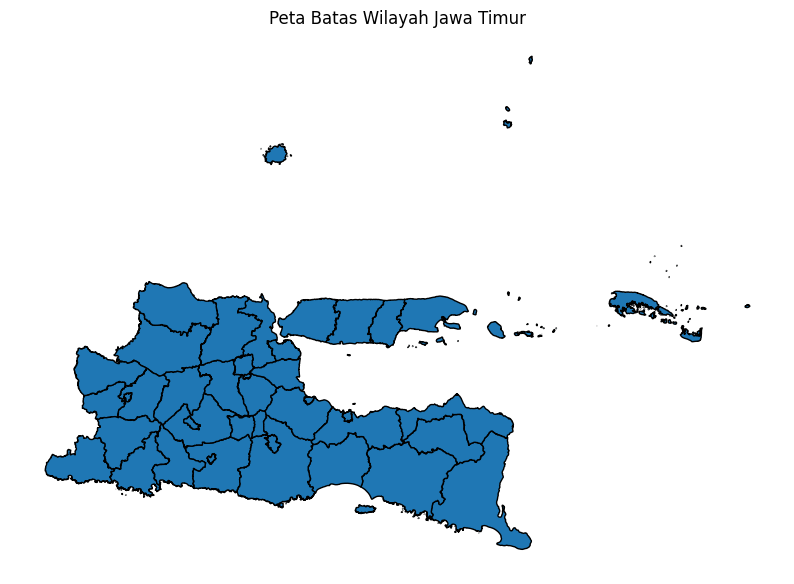

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. LOAD GEOJSON ---
gdf = gpd.read_file("/content/Koordinat_Batas_Jawa_Timur.geojson")
plt.figure(figsize=(10, 10))
gdf.plot(edgecolor="black", figsize=(10,10))
plt.title("Peta Batas Wilayah Jawa Timur")
plt.axis("off")
plt.show()

In [ ]:
gdf["NAME_2"].unique()

array(['Bangkalan', 'Banyuwangi', 'Batu', 'Blitar', 'Bojonegoro',
       'Bondowoso', 'Gresik', 'Jember', 'Jombang', 'Kediri',
       'Kota Blitar', 'Kota Kediri', 'Kota Madiun', 'Kota Malang',
       'Kota Mojokerto', 'Kota Pasuruan', 'Kota Probolinggo', 'Lamongan',
       'Lumajang', 'Madiun', 'Magetan', 'Malang', 'Mojokerto', 'Nganjuk',
       'Ngawi', 'Pacitan', 'Pamekasan', 'Pasuruan', 'Ponorogo',
       'Probolinggo', 'Sampang', 'Sidoarjo', 'Situbondo', 'Sumenep',
       'Surabaya', 'Trenggalek', 'Tuban', 'Tulungagung'], dtype=object)

In [ ]:
df_mean["kabupaten/kota"].unique()

array(['kab. bangkalan', 'kab. banyuwangi', 'kab. blitar',
       'kab. bojonegoro', 'kab. bondowoso', 'kab. gresik', 'kab. jember',
       'kab. jombang', 'kab. kediri', 'kab. lamongan', 'kab. lumajang',
       'kab. madiun', 'kab. magetan', 'kab. malang', 'kab. mojokerto',
       'kab. nganjuk', 'kab. ngawi', 'kab. pacitan', 'kab. pamekasan',
       'kab. pasuruan', 'kab. ponorogo', 'kab. probolinggo',
       'kab. sampang', 'kab. sidoarjo', 'kab. situbondo', 'kab. sumenep',
       'kab. trenggalek', 'kab. tuban', 'kab. tulungagung', 'kota batu',
       'kota blitar', 'kota kediri', 'kota madiun', 'kota malang',
       'kota mojokerto', 'kota pasuruan', 'kota probolinggo',
       'kota surabaya'], dtype=object)

In [ ]:
gdf["nama_clean"] = (
    gdf["NAME_2"]
    .str.lower()
    .str.replace("kota ", "", regex=False)
    .str.strip()
)


In [ ]:
gdf["kabupaten/kota"] = gdf.apply(
    lambda row:
        ("kota " + row["nama_clean"])
        if row["TYPE_2"].lower() == "kota"
        else ("kab. " + row["nama_clean"]),
    axis=1
)
set(gdf["kabupaten/kota"]) - set(df_mean["kabupaten/kota"])

set()

In [ ]:
gdf

,ID_0,COUNTRY,NAME_1,NL_NAME_1,ID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,nama_clean,kabupaten/kota
0,IDN,Indonesia,Jawa Timur,None,IDN.11.1_1,Bangkalan,None,None,Kabupaten,Regency,3526,ID.JI.BK,"MULTIPOLYGON (((112.97428 -7.1996, 112.97409 -...",bangkalan,kab. bangkalan
1,IDN,Indonesia,Jawa Timur,None,IDN.11.2_1,Banyuwangi,None,None,Kabupaten,Regency,3510,ID.JI.BW,"MULTIPOLYGON (((114.36061 -8.65745, 114.36009 ...",banyuwangi,kab. banyuwangi
2,IDN,Indonesia,Jawa Timur,None,IDN.11.3_1,Batu,None,None,Kota,City,3579,ID.JI.BA,"MULTIPOLYGON (((112.52912 -7.9254, 112.52888 -...",batu,kota batu
3,IDN,Indonesia,Jawa Timur,None,IDN.11.4_1,Blitar,None,None,Kabupaten,Regency,3505,ID.JI.BR,"MULTIPOLYGON (((112.23884 -8.35246, 112.23882 ...",blitar,kab. blitar
4,IDN,Indonesia,Jawa Timur,None,IDN.11.5_1,Bojonegoro,None,None,Kabupaten,Regency,3522,ID.JI.BJ,"MULTIPOLYGON (((111.79704 -7.46133, 111.797 -7...",bojonegoro,kab. bojonegoro
5,IDN,Indonesia,Jawa Timur,None,IDN.11.6_1,Bondowoso,None,None,Kabupaten,Regency,3511,ID.JI.BD,"MULTIPOLYGON (((113.86049 -8.02954, 113.85921 ...",bondowoso,kab. bondowoso
6,IDN,Indonesia,Jawa Timur,None,IDN.11.7_1,Gresik,None,None,Kabupaten,Regency,3525,ID.JI.GR,"MULTIPOLYGON (((112.62847 -7.29293, 112.62839 ...",gresik,kab. gresik
7,IDN,Indonesia,Jawa Timur,None,IDN.11.8_1,Jember,None,None,Kabupaten,Regency,3509,ID.JI.JE,"MULTIPOLYGON (((113.66013 -8.50156, 113.66015 ...",jember,kab. jember
8,IDN,Indonesia,Jawa Timur,None,IDN.11.9_1,Jombang,None,None,Kabupaten,Regency,3517,ID.JI.JO,"MULTIPOLYGON (((112.27322 -7.35732, 112.27361 ...",jombang,kab. jombang
9,IDN,Indonesia,Jawa Timur,None,IDN.11.10_1,Kediri,None,None,Kabupaten,Regency,3506,ID.JI.KR,"MULTIPOLYGON (((111.97362 -8.01049, 111.97346 ...",kediri,kab. kediri


In [ ]:
unmatched = set(gdf["kabupaten/kota"]) - set(df_mean["kabupaten/kota"])
unmatched

set()

In [ ]:
gdf_final = gdf.merge(df_mean, on="kabupaten/kota", how="left")


In [ ]:
gdf_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID_0                            38 non-null     object  
 1   COUNTRY                         38 non-null     object  
 2   NAME_1                          38 non-null     object  
 3   NL_NAME_1                       0 non-null      object  
 4   ID_2                            38 non-null     object  
 5   NAME_2                          38 non-null     object  
 6   VARNAME_2                       0 non-null      object  
 7   NL_NAME_2                       0 non-null      object  
 8   TYPE_2                          38 non-null     object  
 9   ENGTYPE_2                       38 non-null     object  
 10  CC_2                            38 non-null     object  
 11  HASC_2                          38 non-null     object  
 12  geometry        

In [ ]:
gdf_final.to_file("stunting_geo.geojson", driver="GeoJSON")

In [ ]:
df_geo = pd.read_csv("/content/stunting_geo.csv")